In [84]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import matplotlib.dates as mdates
from scipy.stats import linregress
from api_keys import nas_api_key
from functools import reduce
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from matplotlib.dates import (YEARLY, DateFormatter,
                              rrulewrapper, RRuleLocator, drange)
from matplotlib.dates import AutoDateLocator, AutoDateFormatter, date2num


In [85]:
# Set the base URL  api_key=fZZGHvCirnsxtCCmwm3W
url = "https://data.nasdaq.com/api/v3/datasets/RATEINF/CPI_USA.csv?"
queryURL = f"{url}appid={nas_api_key}"

print(queryURL)

# Define an empty list to fetch data 
#cpi_data = []

# Print to logger
#print("Beginning Data Retrieval    ")
#print("----------------------------")


https://data.nasdaq.com/api/v3/datasets/RATEINF/CPI_USA.csv?appid=fZZGHvCirnsxtCCmwm3W


In [86]:
# Set the base URL api_key=fZZGHvCirnsxtCCmwm3W&transform=rdiff
url = "https://data.nasdaq.com/api/v3/datasets/RATEINF/CPI_USA.json?"
queryURLjson = f"{url}appid={nas_api_key}"

print(queryURLjson)

https://data.nasdaq.com/api/v3/datasets/RATEINF/CPI_USA.json?appid=fZZGHvCirnsxtCCmwm3W


In [87]:
# import data files
facebookDataPath = "data/Facebook.csv"
amazonDataPath = "data/Amazon.csv"
appleDataPath = "data/Apple.csv"
netflixDataPath = "data/Netflix.csv"
googleDataPath = "data/Google.csv"

# read and display the data
facebook_csv = pd.read_csv(facebookDataPath)
amazon_csv = pd.read_csv(amazonDataPath)
apple_csv = pd.read_csv(appleDataPath)
netflix_csv = pd.read_csv(netflixDataPath)
google_csv = pd.read_csv(googleDataPath)

In [88]:
# add a label column to each stock's dataset
facebook_csv.insert(0, "Label", "Facebook")
amazon_csv.insert(0, "Label", "Amazon")
apple_csv.insert(0, "Label", "Apple")
netflix_csv.insert(0, "Label", "Netlfix")
google_csv.insert(0, "Label", "Google")

In [128]:
# locate data only for 2022 -- rows 45 thru 295
fb = facebook_csv.iloc[44:294, :]
am = amazon_csv.iloc[44:294, :]
ap = apple_csv.iloc[44:294, :]
nf = netflix_csv.iloc[44:294, :]
gl = google_csv.iloc[44:294, :]

In [129]:
# merge the dataframes
merge1 = pd.merge(fb, am, how = "outer")
merge2 = pd.merge(merge1, ap, how = "outer")
merge3 = pd.merge(merge2, nf, how = "outer")
mergedData = pd.merge(merge3, gl, how = "outer")

# print mergedData to the output folder for troubleshooting purposes
mergedData.to_csv("output/printout.csv", index = False)

In [130]:
mergedData.head()

,Label,Date,Close/Last,Volume,Open,High,Low
0,Facebook,12/29/22,$120.26,22366190,$116.40,$121.03,$115.77
1,Facebook,12/28/22,$115.62,19612470,$116.25,$118.15,$115.51
2,Facebook,12/27/22,$116.88,21392310,$117.93,$118.60,$116.05
3,Facebook,12/23/22,$118.04,17796630,$116.03,$118.18,$115.54
4,Facebook,12/22/22,$117.12,23618120,$117.20,$118.62,$114.38


In [137]:

# Define a function to create Linear Regression plots
# xAxis is independent variable
# yAxis is dependent variable
def linReg(xAxis,yAxis,x_lin_plot,y_lin_plot,yLabel):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xAxis, yAxis)
    regression = xAxis * slope + intercept
    linEQ = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,4))
    plt.scatter(xAxis,yAxis)
    plt.plot(xAxis,regression,"r-")
    print(f"The r-value is {rvalue}")
    
    plt.annotate(linEQ,(x_lin_plot,y_lin_plot),fontsize=10,color="red")
    plt.xlabel('Date')
    plt.ylabel(f"{yLabel}")


In [176]:
meta = pd.read_csv('data/Facebook.csv',index_col='Date',parse_dates=True)
meta.head(10)

,Close/Last,Volume,Open,High,Low
Date,,,,,
2023-03-06,$184.90,33209390,$188.00,$189.66,$184.64
2023-03-03,$185.25,45877690,$178.92,$186.62,$177.05
2023-03-02,$174.53,17360710,$172.38,$175.01,$171.43
2023-03-01,$173.42,30998380,$174.59,$177.85,$173.05
2023-02-28,$174.94,46051120,$171.90,$177.55,$171.87
2023-02-27,$169.54,19277000,$171.88,$173.12,$169.06
2023-02-24,$170.39,19791330,$168.64,$170.72,$167.66
2023-02-23,$172.04,20017780,$172.00,$173.69,$169.38
2023-02-22,$171.12,22433160,$171.07,$172.76,$169.69


In [177]:
facebook_SP = meta.iloc[44:294, :]
facebook_SP

,Close/Last,Volume,Open,High,Low
Date,,,,,
2022-12-29,$120.26,22366190,$116.40,$121.03,$115.77
2022-12-28,$115.62,19612470,$116.25,$118.15,$115.51
2022-12-27,$116.88,21392310,$117.93,$118.60,$116.05
2022-12-23,$118.04,17796630,$116.03,$118.18,$115.54
2022-12-22,$117.12,23618120,$117.20,$118.62,$114.38
...,...,...,...,...,...
2022-01-07,$331.79,14722020,$332.74,$337.00,$328.88
2022-01-06,$332.46,27962810,$322.82,$339.17,$322.72
2022-01-05,$324.17,20564520,$333.02,$335.76,$323.84


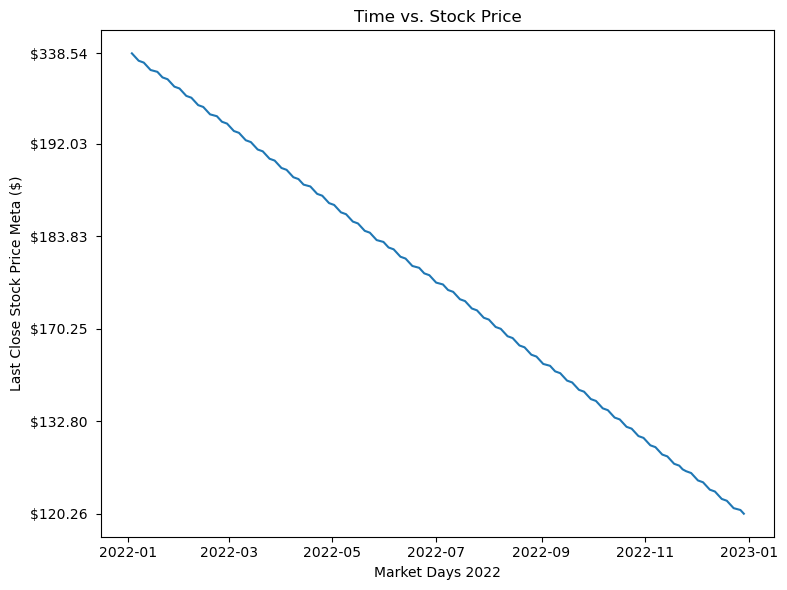

In [211]:

closing_bell = facebook_SP['Close/Last']
# plt.rcParams["figure.figsize"] = [8.00, 6.00]
# plt.rcParams["figure.autolayout"] = True

plt.plot(closing_bell)

plt.title("Time vs. Stock Price")
plt.xlabel("Market Days 2022")
plt.ylabel("Last Close Stock Price Meta ($)")

# linReg(xAxis,yAxis,x_lin_plot,y_lin_plot,yLabel)

#plt.yticks([10,224])
#plt.xticks([10,249])#,75,100,125,150,175,200,225,249])
# fig, ax = plt.subplots()
# ytick_loc = [360, 320, 280, 240, 200, 160, 120, 80, 40]
# ax.set_yticks(ytick_loc)
plt.yticks([0,50,100,150,200,249])
# print(plt.yticks())
plt.show()

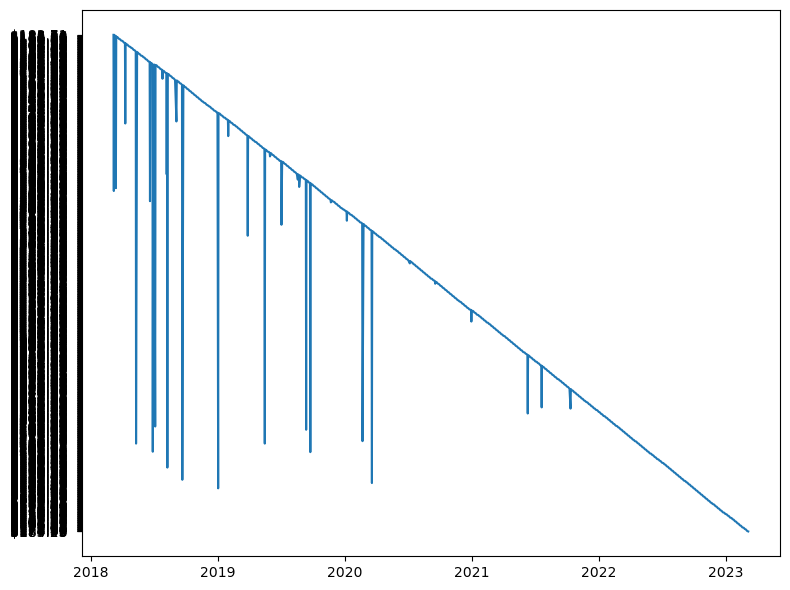

In [171]:
Last = meta['Close/Last']
# Dates = meta['Date']
# plt.plot(Dates,Last)
# plt.show()
plt.plot(Last)
plt.show()

In [172]:
# Create a DataFrame for each FAANG company
facebook_df = facebook_df.loc[mergedData["Label"] == "Facebook", :]
facebook_df = facebook_df.sort_index(ascending=False)


In [161]:
facebook_df

,Label,Date,Close/Last,Volume,Open,High,Low
0,Facebook,12/29/22,$120.26,22366190,$116.40,$121.03,$115.77
1,Facebook,12/28/22,$115.62,19612470,$116.25,$118.15,$115.51
2,Facebook,12/27/22,$116.88,21392310,$117.93,$118.60,$116.05
3,Facebook,12/23/22,$118.04,17796630,$116.03,$118.18,$115.54
4,Facebook,12/22/22,$117.12,23618120,$117.20,$118.62,$114.38
...,...,...,...,...,...,...,...
245,Facebook,1/7/22,$331.79,14722020,$332.74,$337.00,$328.88
246,Facebook,1/6/22,$332.46,27962810,$322.82,$339.17,$322.72
247,Facebook,1/5/22,$324.17,20564520,$333.02,$335.76,$323.84
248,Facebook,1/4/22,$336.53,15997970,$339.95,$343.09,$331.87


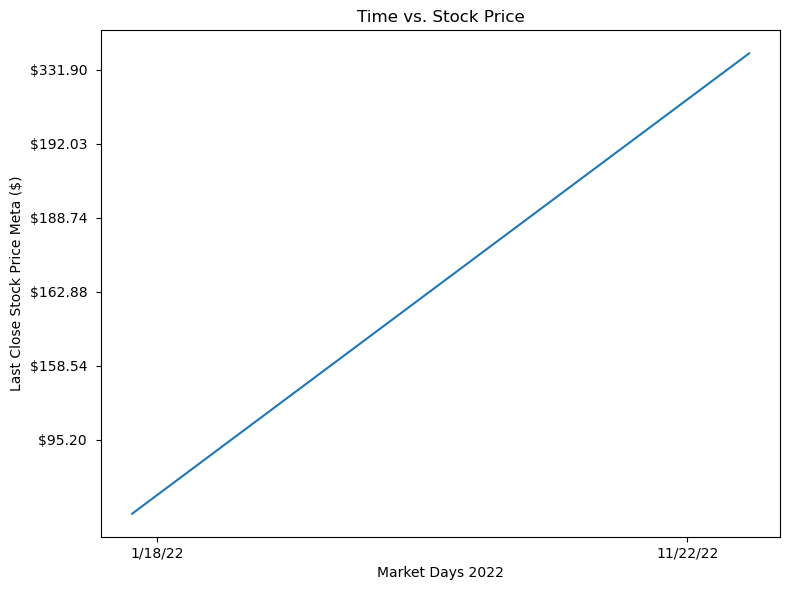

In [160]:
# Stock Price vs. Time Plot Meta
Close = facebook_df["Close/Last"]
Date = facebook_df1["Date"]
locator = AutoDateLocator()
formatter = AutoDateFormatter(locator)
#rule = rrulewrapper(MONTHLY, bywednesday=1, interval=1)
#loc = RRuleLocator(rule)
#formatter = DateFormatter('%m/%d/%y')
#date1 = datetime.date(2022)

plt.rcParams["figure.figsize"] = [8.00, 6.00]
plt.rcParams["figure.autolayout"] = True


fig, ax = plt.subplots()
ytick_loc = [360, 320, 280, 240, 200, 160, 120, 80, 40]
ax.set_yticks(ytick_loc)


#axes.xaxis.set_major_formatter(fmt)
#axes.tick_params(rotation=10)

yAxis = Close
xAxis = Date
plt.plot(Date,Close)
plt.title("Time vs. Stock Price")
plt.xlabel("Market Days 2022")
plt.ylabel("Last Close Stock Price Meta ($)")

# linReg(xAxis,yAxis,x_lin_plot,y_lin_plot,yLabel)
#plt.gcf().autofmt_xdate()
#plt.yticks([10,224])
plt.xticks([10,224])
plt.show()

In [12]:
# How do interest rate changes from the Federal Reserve affect stock prices during 2022?

TreasuryRatesDataPath = "data/TreasuryRates.csv"
TreasuryRates_csv = pd.read_csv(TreasuryRatesDataPath)
TreasuryRates_csv.insert(0, "Label", "Treasury Rates")
tr = TreasuryRates_csv.iloc[45:293, :]
fb = facebook_csv.iloc[45:295, :]

mergeIntRateFB = pd.merge(fb, tr, on = "Date", how = "outer")
mergeIntRateFB.head()

,Label_x,Date,Close/Last,Volume,Open,High,Low,Label_y,LT Composite > 10 Yrs,Treasury 20-Yr CMT,Extrapolation Factor
0,Facebook,12/28/22,$115.62,19612470,$116.25,$118.15,$115.51,Treasury Rates,0.009828,0.007317,NaN
1,Facebook,12/27/22,$116.88,21392310,$117.93,$118.60,$116.05,Treasury Rates,0.025189,0.027569,NaN
2,Facebook,12/23/22,$118.04,17796630,$116.03,$118.18,$115.54,Treasury Rates,0.023196,0.020460,NaN
3,Facebook,12/22/22,$117.12,23618120,$117.20,$118.62,$114.38,Treasury Rates,-0.005128,-0.005089,NaN
4,Facebook,12/21/22,$119.76,20392800,$116.70,$120.34,$115.62,Treasury Rates,0.000000,-0.002538,NaN


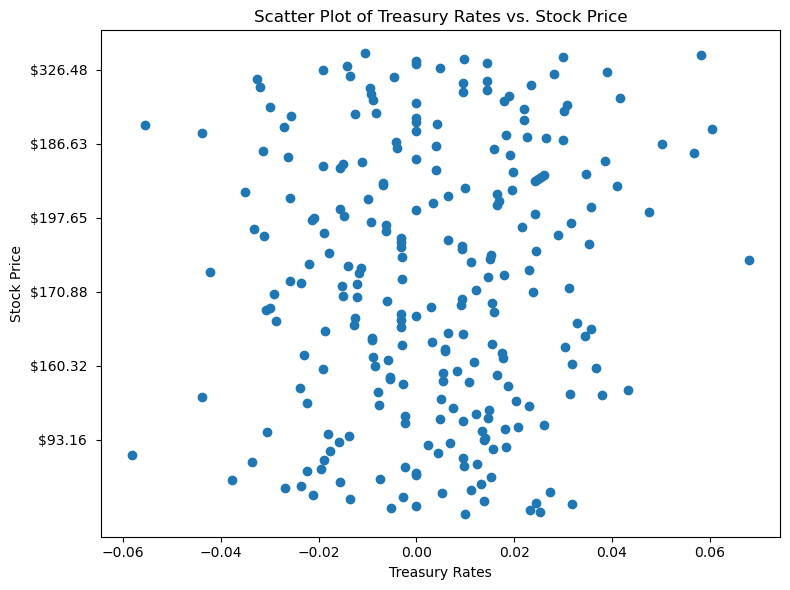

In [58]:
LastClose = mergeIntRateFB["Close/Last"]
IntRate = mergeIntRateFB["LT Composite > 10 Yrs"]
plt.rcParams["figure.figsize"] = [8.00, 6.00]
plt.rcParams["figure.autolayout"] = True
fig, ax = plt.subplots()
ytick_loc = [40, 80, 120, 160, 200, 240, 280, 320, 340]
ax.set_yticks(ytick_loc)
#plt.tick_params(left = False,labelleft = False)
# Incorporate the other graph properties
plt.title("Scatter Plot of Treasury Rates vs. Stock Price")
plt.xlabel("Treasury Rates")
plt.ylabel("Stock Price")
plt.scatter(IntRate,LastClose)
plt.show()

NameError: name 'x' is not defined

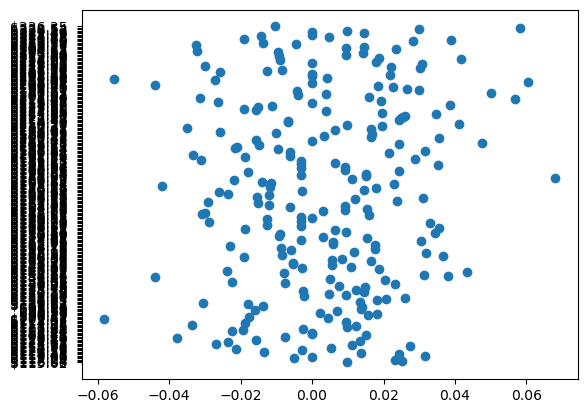

In [53]:
# Reduce y ticks for visbility of y values

plt.scatter(IntRate,LastClose)
#plt.yticks(np.arange(min(LastClose), max(x) + 1, 1.0))
plt.ylabel("Stock Price ($)")
plt.xlabel("Treasury Rates")
ax = plt.gca()
ax.axes.yaxis.set_ticklabels([])


plt.show()

    

AttributeError: 'tuple' object has no attribute 'scatter'

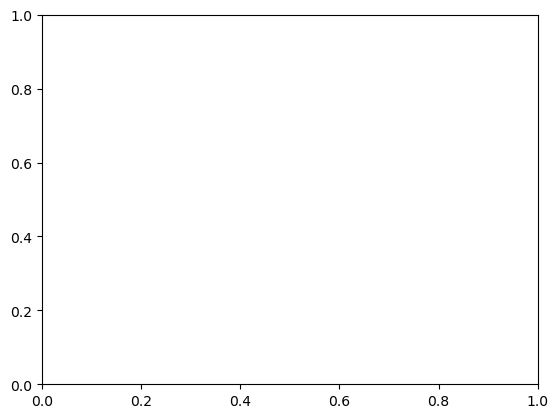

In [49]:
# Format y ticks correctly using matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

yax = plt.subplots()
yax.scatter(IntRate,LastClose)

# Make a plot with major ticks that are multiples of 20 and minor ticks multiples of 5.  Label major ticks with '0f'
# formatting but don't label minor ticks.  
yax.yaxis.set_major_locator(MultipleLocator(20))
yax.yaxis.set_major_formatter('{x:.0f}')

# For the minor ticks, us no labels; default NullFormatter
yax.yaxis.set_minor_locator(MultipleLocator(10))

plt.show()

In [27]:
print(LastClose)

0      $115.62 
1      $116.88 
2      $118.04 
3      $117.12 
4      $119.76 
         ...   
245    $332.46 
246    $324.17 
247    $336.53 
248    $338.54 
249    $336.35 
Name: Close/Last, Length: 250, dtype: object


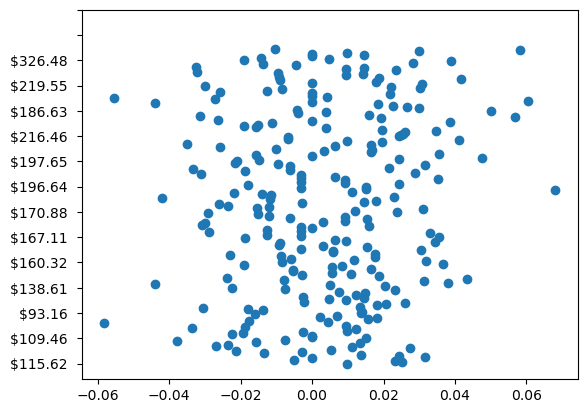

In [36]:
# Format range and interval of ticks on the y-axis
plt.scatter(IntRate,LastClose)
listOf_Yticks = np.arange(0,300,20)
plt.yticks(listOf_Yticks)

plt.show()

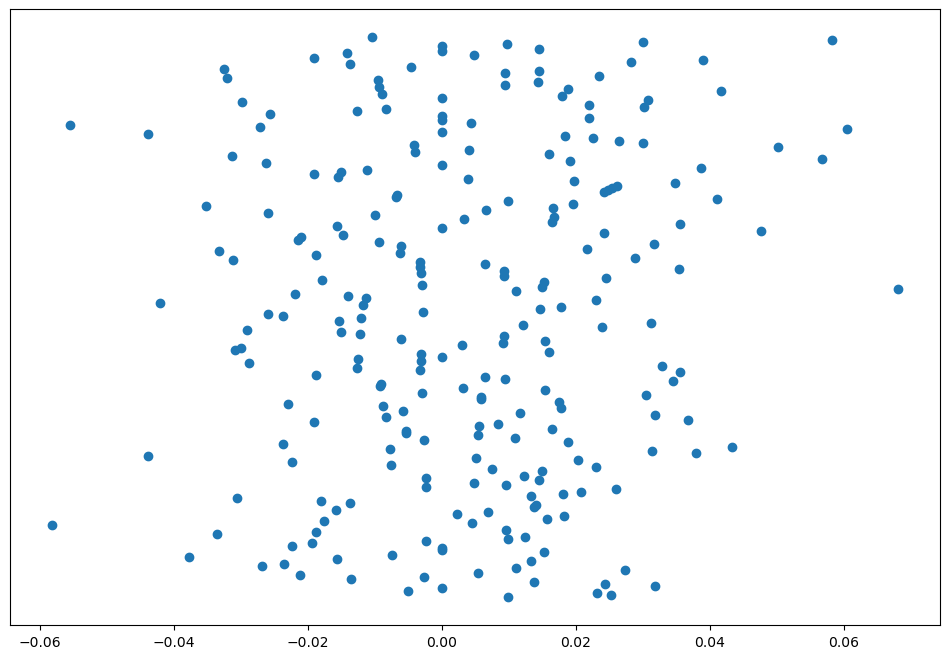

In [45]:
plt.figure(figsize = (12,8))
plt.tick_params(left = False,labelleft = False)

plt.scatter(IntRate,LastClose)
plt.show()

In [42]:
ax = plt.scatter.axes(IntRate,LastClose)
#plt.scatter(IntRate,LastClose)
ax.set_yticks([20,40,60,80,100,120,140,160,180,200,220,240,260,280,300,320,340])
plt.show()

AttributeError: 'function' object has no attribute 'axes'